In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/achristie/ca6abc53001ee31ca7b72c17475cfd4c/raw/32a1dba175cf61dfd70f6ee772d84a75cff01e7a/cancer_classification.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.shape

(569, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

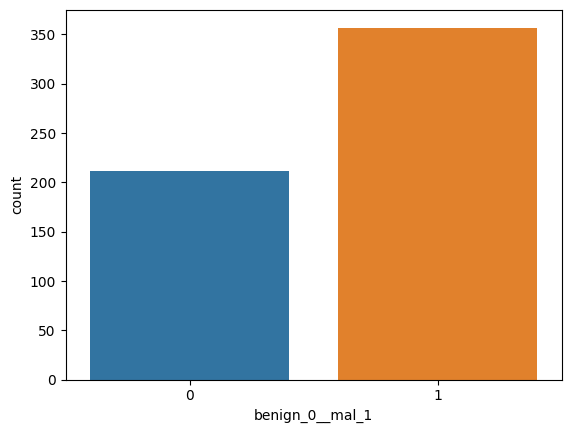

In [7]:
sns.countplot(x = 'benign_0__mal_1', data = df)
plt.show()

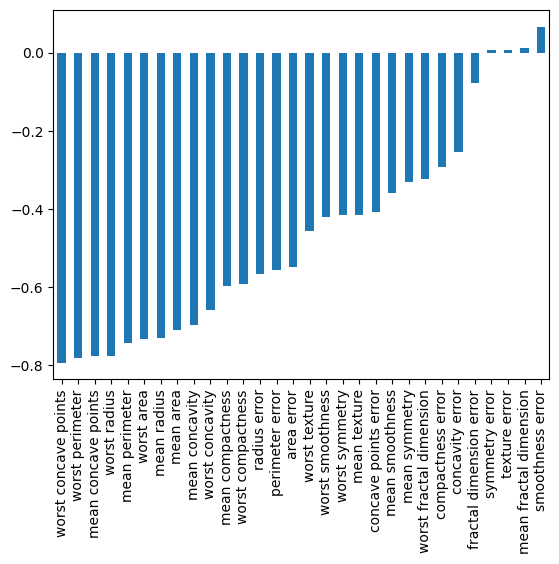

In [8]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')
plt.show()

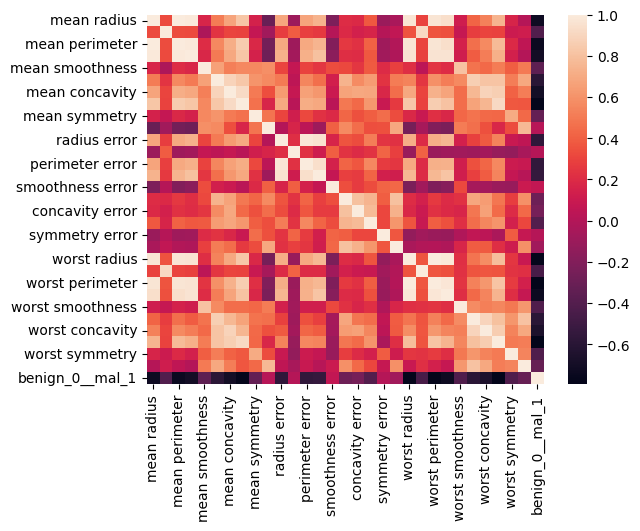

In [9]:
sns.heatmap(df.corr())
plt.show()

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [11]:
df.iloc[:, -1]


0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: benign_0__mal_1, Length: 569, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
#Creating the Model

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [18]:
X_train.shape[1]

30

In [19]:
model = Sequential()

model.add(Dense(X_train.shape[1], activation = 'relu'))
model.add(Dense(X_train.shape[1]/2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [20]:
model.fit(X_train, y_train,
          epochs = 600,
          validation_data = (X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 23ms/step - loss: 0.6655 - val_loss: 0.6401
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6187 - val_loss: 0.6030
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5781 - val_loss: 0.5557
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5307 - val_loss: 0.5044
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4778 - val_loss: 0.4491
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4271 - val_loss: 0.3991
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3813 - val_loss: 0.3529
Epoch 8/600
14/14 [==============================] - 0s 12ms/step - loss: 0.3417 - val_loss: 0.3148
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3097 - val_loss: 0.2834
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2833 - val_loss: 0.2589
Epoch 1

<Axes: >

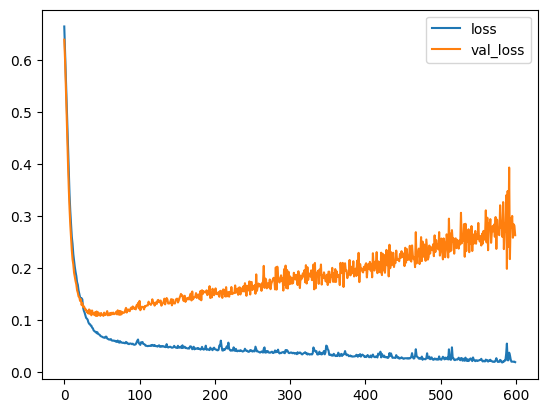

In [21]:
losses = pd.DataFrame(model.history.history)

### Classic overfit

losses.plot()

In [22]:
### Stopping Overfitting with Dropout

In [23]:
#from keras.callbacks import EarlyStopping

In [24]:
#help(EarlyStopping)

In [25]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


model.fit(X_train, y_train,
          epochs = 600,
          validation_data = (X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6960 - accuracy: 0.6291 - val_loss: 0.6859 - val_accuracy: 0.6154
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6888 - accuracy: 0.6291 - val_loss: 0.6649 - val_accuracy: 0.6154
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6636 - accuracy: 0.6362 - val_loss: 0.6451 - val_accuracy: 0.6294
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6479 - val_loss: 0.6280 - val_accuracy: 0.7832
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6109 - accuracy: 0.6925 - val_loss: 0.6051 - val_accuracy: 0.8112
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6252 - accuracy: 0.6854 - val_loss: 0.5835 - val_accuracy: 0.8042
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5987 - accuracy: 0.7089 - val_loss: 0.5627 - val_accuracy: 0.8112
Epoch 8/600


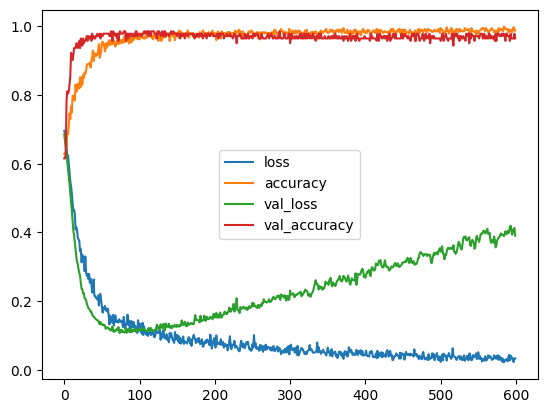

In [26]:
losses = pd.DataFrame(model.history.history)
losses.plot()

plt.show()

In [27]:
from keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 25)

In [29]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


model.fit(X_train, y_train,
          epochs = 600,
          validation_data = (X_test, y_test),
          callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.7057 - accuracy: 0.4953 - val_loss: 0.6870 - val_accuracy: 0.6713
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6823 - accuracy: 0.5869 - val_loss: 0.6687 - val_accuracy: 0.8601
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6661 - accuracy: 0.6338 - val_loss: 0.6508 - val_accuracy: 0.8881
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6529 - accuracy: 0.6784 - val_loss: 0.6299 - val_accuracy: 0.9161
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6207 - accuracy: 0.7371 - val_loss: 0.6046 - val_accuracy: 0.9441
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5969 - accuracy: 0.7653 - val_loss: 0.5782 - val_accuracy: 0.9441
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6002 - accuracy: 0.7676 - val_loss: 0.5528 - val_accuracy: 0.9371
Epoch 8/600


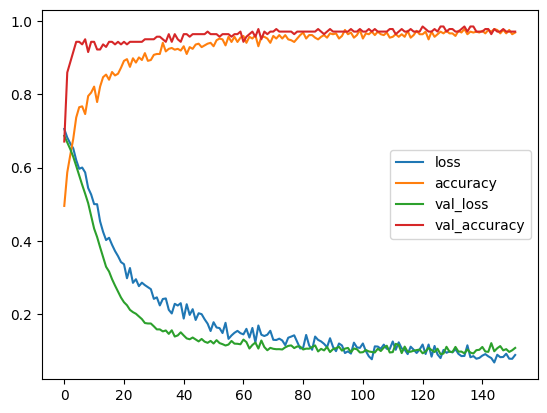

In [30]:
losses = pd.DataFrame(model.history.history)
losses.plot()

plt.show()

In [ ]:
### Regularization

In [30]:
from keras import regularizers

model = Sequential()

model.add(Dense(30, activation = 'relu', kernel_regularizer='l1'))

model.add(Dense(15, activation = 'relu', kernel_regularizer = 'l1_l2'))
model.add(Dense(1, activation = 'sigmoid')) #activation sigmoid for binary classification

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')


model.fit(x = X_train,y = y_train, epochs = 600,
          validation_data = (X_test, y_test),
         callbacks = [early_stop])

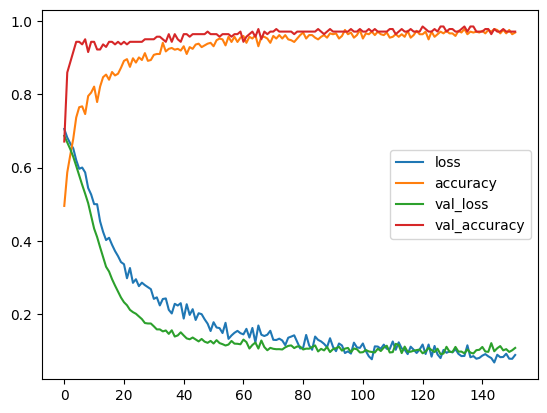

In [31]:
losses = pd.DataFrame(model.history.history)
losses.plot()

plt.show()